In [1]:
!pip install gymnasium
!pip install "gymnasium[atari]"
!pip install ale-py
!pip install autorom[accept-rom-license]

   ---------------------------------------- 0.0/951.1 kB ? eta -:--:--
   ---------------------------------------- 951.1/951.1 kB 6.2 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   -------------------- ------------------- 1/2 [gymnasium]
   ---------------------------------------- 2/2 [gymnasium]

   ---------------------------------------- 0.0/3.5 MB ? eta -:--:--
   --------------------------------- ------ 2.9/3.5 MB 20.6 MB/s eta 0:00:01
   ---------------------------------------- 3.5/3.5 MB 16.4 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished w

# RESTART YOUR KERNEL AND THEN RUN THE REST OF THE PROGRAM.
# DO NOT PERFORM THE INSTALLATIONS AGAIN

# If a player has a 25% chance of hitting the alien with any single shot, and takes 12 shots at the alien during a game, what is the probability that they hit exactly 4 times?

In [2]:
import ale_py
import gymnasium as gym

# Register the ALE environments
gym.register_envs(ale_py)

# Now check the registry
gym.pprint_registry()

===== classic_control =====
Acrobot-v1                  CartPole-v0                 CartPole-v1
MountainCar-v0              MountainCarContinuous-v0    Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0          phys2d/CartPole-v1          phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3            BipedalWalkerHardcore-v3    CarRacing-v3
LunarLander-v3              LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1                CliffWalking-v1             CliffWalkingSlippery-v1
FrozenLake-v1               FrozenLake8x8-v1            Taxi-v3
===== tabular =====
tabular/Blackjack-v0        tabular/CliffWalking-v0
===== None =====
Ant-v2                      Ant-v3                      GymV21Environment-v0
GymV26Environment-v0        HalfCheetah-v2              HalfCheetah-v3
Hopper-v2                   Hopper-v3                   Humanoid-v2
Humanoid-v3                 HumanoidStandup-v2          InvertedDoublePendulum-v2
InvertedPendulum-v2         Pusher-v2             

🎯 Theoretical Probability of hitting exactly 4 times: 0.1936 (19.36%)
🧪 Empirical Probability (from 100,000 simulated games): 0.1944 (19.44%)

Example Game Simulation:
Shots fired: ['Miss', 'Miss', 'Miss', 'Miss', 'Miss', 'Miss', 'Hit', 'Miss', 'Miss', 'Miss', 'Miss', 'Miss']
Total Hits: 1


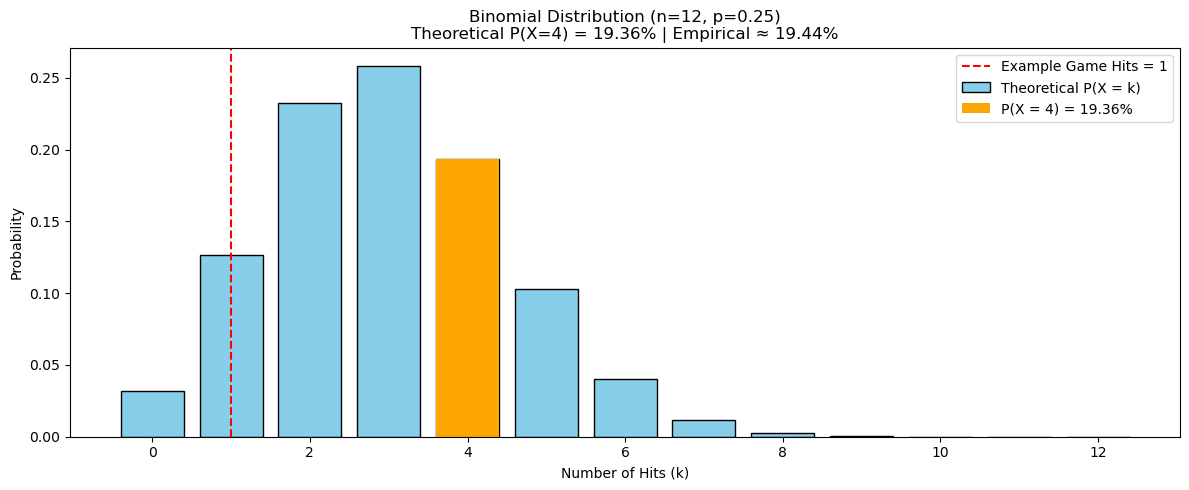

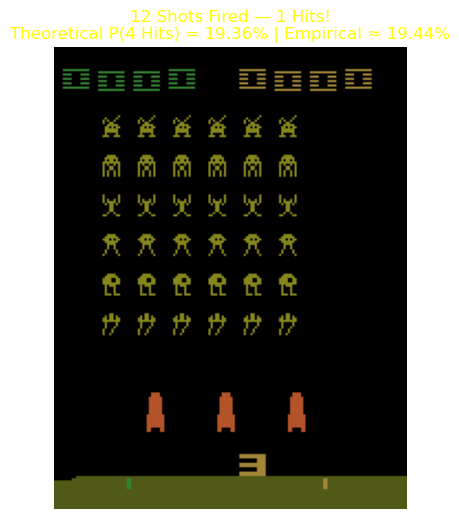

In [5]:
# --- Import packages ---
import gymnasium as gym
import matplotlib.pyplot as plt
import random
import math
import numpy as np

# --- Create Atari Space Invaders environment ---
env = gym.make("ALE/SpaceInvaders-v5", render_mode="rgb_array")
observation, info = env.reset(seed=42)

# --- Theoretical probability using binomial formula ---
n = 12         # number of shots
p = 0.25       # hit probability
k = 4          # exact hits

# Binomial Probability
probability = math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print(f"🎯 Theoretical Probability of hitting exactly {k} times: {probability:.4f} ({probability*100:.2f}%)")

# --- Empirical Simulation ---
num_trials = 100_000
exact_hits_count = 0

for _ in range(num_trials):
    hits = sum(1 for _ in range(n) if random.random() <= p)
    if hits == k:
        exact_hits_count += 1

empirical_prob = exact_hits_count / num_trials
print(f"🧪 Empirical Probability (from {num_trials:,} simulated games): {empirical_prob:.4f} ({empirical_prob*100:.2f}%)")

# --- Visual Simulation: Represent 12 random shots ---
shots = ["Hit" if random.random() <= p else "Miss" for _ in range(n)]
hits = shots.count("Hit")

print("\nExample Game Simulation:")
print("Shots fired:", shots)
print("Total Hits:", hits)

# --- Visualize one Space Invaders frame as backdrop ---
frame = env.render()

plt.figure(figsize=(12, 5))

# 1️⃣ Left: Probability distribution visualization
x = np.arange(0, n + 1)
y = [math.comb(n, i) * (p ** i) * ((1 - p) ** (n - i)) for i in x]

bars = plt.bar(x, y, color="skyblue", edgecolor="black", label="Theoretical P(X = k)")
plt.bar(k, y[k], color="orange", label=f"P(X = {k}) = {y[k]*100:.2f}%")
plt.axvline(hits, color="red", linestyle="--", label=f"Example Game Hits = {hits}")

plt.title(
    f"Binomial Distribution (n={n}, p={p})\n"
    f"Theoretical P(X={k}) = {probability*100:.2f}% | Empirical ≈ {empirical_prob*100:.2f}%",
    fontsize=12
)
plt.xlabel("Number of Hits (k)")
plt.ylabel("Probability")
plt.legend()
plt.tight_layout()
plt.show()

# 2️⃣ Right: Space Invaders visual metaphor
plt.figure(figsize=(6, 6))
plt.imshow(frame)
plt.axis("off")
plt.title(
    f"12 Shots Fired — {hits} Hits!\n"
    f"Theoretical P(4 Hits) = {probability*100:.2f}% | Empirical ≈ {empirical_prob*100:.2f}%",
    fontsize=12, color="yellow"
)
plt.show()

env.close()


# If a player takes exactly 12 shots during a game of space invaders, the probability of exactly 4 shots landing on an invader thing is 19.37%
P(X=4)≈0.1937 or 19.37%

# empirical probability from 100,000 games = 19.44%